<a href="https://colab.research.google.com/github/smorenorod/Python-Codes/blob/main/NLP_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import string

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


[nltk_data] Downloading package wordnet to /root/nltk_data...


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:

# Defining the columns to read
usecols = ["index","name", "genre",  "overview"]

# Read data with subset of columns
movies_data = pd.read_csv("drive/My Drive/train_data.csv", names=usecols)

In [ ]:
# Defining the columns to read
# usecols = ["index","name",  "overview"]

# movies_data_test = pd.read_csv("drive/My Drive/test_data.csv", names=usecols)

In [ ]:
# Defining the columns to read
# usecols = ["index","name", "genre",  "overview"]

# movies_data_test_sol = pd.read_csv("drive/My Drive/test_data_solution.csv", names=usecols)

In [ ]:
movies_data

,index,name,genre,overview
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...,...
54209,54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...
54210,54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...
54211,54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54212,54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...


In [4]:
movies_data['overview_length'] = movies_data.overview.apply(len)

In [5]:
movies_data["genre"]=movies_data.genre.str.strip()  #strip here is doing triming of the string

In [6]:
#creating a binary variable
movies_data["is_drama"]=False
movies_data.loc[movies_data.genre.str.strip()== "drama","is_drama"]=True  #strip here is doing triming of the string in case of needed

In [31]:
print(movies_data.loc[movies_data["is_drama"]==True,"genre"].unique()) #checking binary variable

[' drama ']


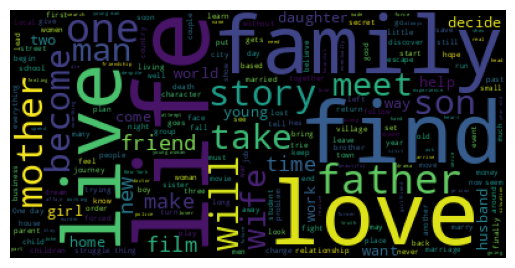

In [38]:
#DRAMA
text = list(movies_data[movies_data.genre.str.strip()== "drama"].overview.values)  #strip here is doing triming of the string in case of needed

wordcloud = WordCloud(stopwords=STOPWORDS).generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()



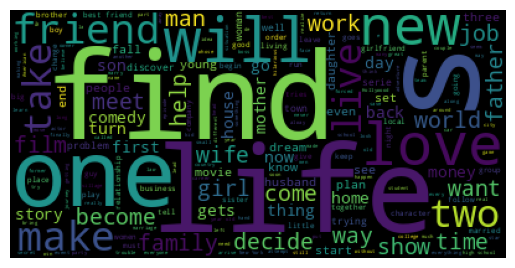

In [ ]:
#Comedy
text = list(movies_data[movies_data.genre.str.strip()== "comedy"].overview.values)  #strip here is doing triming of the string in case of needed

wordcloud = WordCloud(stopwords=STOPWORDS).generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()



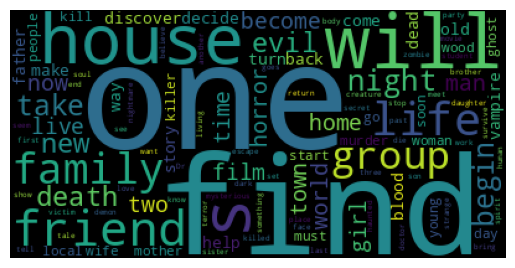

In [ ]:


#horror
text = list(movies_data[movies_data.genre.str.strip()== "horror"].overview.values)  #strip here is doing triming of the string in case of needed

wordcloud = WordCloud(stopwords=STOPWORDS).generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()



## **Cleaning & Preprocessing The Data**

let's remove all the short descriptions

In [7]:

movies_data = movies_data.loc[movies_data["overview_length"] > 10]

let's remove punctuation

In [8]:

exclude = set(string.punctuation)
def remove_punctoation(row):
  row.overview = ''.join(ch for ch in row.overview if ch not in exclude)
  return row


In [9]:
movies_data = movies_data.apply(remove_punctoation, axis = 1)


In [42]:

movies_data.head()

,index,name,genre,overview,overview_length,is_drama
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,546,True
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,184,False
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,650,False
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,1082,True
4,5,The Unrecovered (2007),drama,The films title refers not only to the unreco...,625,True


Lemmatisation

https://www.geeksforgeeks.org/python-lemmatization-with-nltk/#:~:text=Lemmatization%20is%20the%20process%20of,similar%20meaning%20to%20one%20word

In [10]:
lemmatizer = WordNetLemmatizer()
def lemmatize_text(row):
  row.overview = " ".join(lemmatizer.lemmatize(word) for word in row.overview.split())
  return row


In [11]:
movies_data = movies_data.apply(lemmatize_text, axis = 1)

In [12]:
movies_data.head()

,index,name,genre,overview,overview_length,is_drama
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...,546,True
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous re...,184,False
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empty the student for their field t...,650,False
3,4,The Secret Sin (1915),drama,To help their unemployed father make end meet ...,1082,True
4,5,The Unrecovered (2007),drama,The film title refers not only to the unrecove...,625,True


In [13]:
movies_data.overview.loc[6]

'In tough economic time Max and Joey have all but run out of idea until they discover that senior housing is cheap Not only that but Maxs aunt just kicked the bucket and no one know yet In a hilarious series that always keep you on your toe the two friend take u on a crossdressing desperate and endearing ride through being broke'

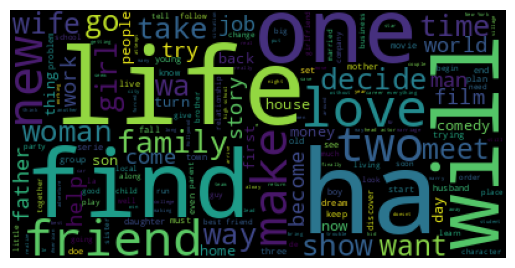

In [47]:
#Comedy
text = list(movies_data[movies_data.genre.str.strip()== "comedy"].overview.values)  #strip here is doing triming of the string in case of needed

wordcloud = WordCloud(stopwords=STOPWORDS).generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()



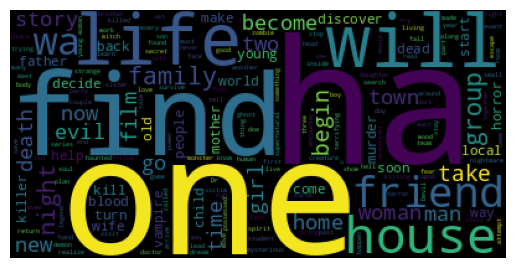

In [48]:
#horror
text = list(movies_data[movies_data.genre.str.strip()== "horror"].overview.values)  #strip here is doing triming of the string in case of needed

wordcloud = WordCloud(stopwords=STOPWORDS).generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()



##Converting the data into vectors

count vectorizer

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [14]:

vectorizer = CountVectorizer(lowercase = True, stop_words=list(STOPWORDS) #STOPWORDS
                             , max_features= 2000)
count_vectors = vectorizer.fit_transform(movies_data.overview)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn(


In [15]:
count_vectors.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

TFIDF vectorizer

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

In [16]:
TFIDF_vectorizer = TfidfVectorizer(lowercase = True, stop_words=list(STOPWORDS) #STOPWORDS
                                   , max_features = 2000)
tfidf_vectors = TFIDF_vectorizer.fit_transform(movies_data.overview)

In [17]:
tfidf_vectors.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

##Modeling
Split to Train and Test

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [18]:
#keeping 20% for testing and 80% for train
X_count_train, X_count_test, y_count_train, y_count_test = train_test_split(tfidf_vectors, list(movies_data.is_drama), test_size=0.2, random_state=42)



In [20]:
X_tfidf_train, X_tfidf_test, y_tfidf_train, y_tfidf_test = train_test_split(tfidf_vectors, list(movies_data.is_drama), test_size=0.2, random_state=42)


Multinomial naive bayes

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#:~:text=The%20multinomial%20Naive%20Bayes%20classifier,tf%2Didf%20may%20also%20work.

In [21]:

model = MultinomialNB()
model.fit(X_count_train, y_count_train)
score_train = model.score(X_count_train, y_count_train)
score_test = model.score(X_count_test, y_count_test)
print("\nTrain set score:", score_train)
print("Test set score:", score_test)



Train set score: 0.7879919762052985
Test set score: 0.7839158904362261


In [22]:
y_pred = model.predict(X_count_test)

In [23]:
y_pred

array([False, False, False, ..., False, False, False])

In [ ]:
movies_data["is_drama"]==True,